### Edgar Moises Hernandez-Gonzalez
#### 01/04/20-02/04/20
#### Clasificacion de CIFAR10 con data augmentation usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 77.25%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [0]:
datagen_train = ImageDataGenerator(
	rotation_range=20,
	width_shift_range=0.2,
	height_shift_range=0.2,
	horizontal_flip=True)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:]))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [31]:
history = model.fit_generator(datagen_train.flow(x_train, y_train_categorical, batch_size=128),
                              steps_per_epoch=np.ceil(n_samples_train/128),
                              epochs=100,
                              validation_data=(x_test, y_test_categorical),
                              verbose=2)
# no se usa porque validation_data no es un generador
#validation_steps=np.ceil(n_samples_test/128)

Epoch 1/100
391/391 - 21s - loss: 1.8752 - accuracy: 0.2978 - val_loss: 1.5450 - val_accuracy: 0.4383
Epoch 2/100
391/391 - 21s - loss: 1.6328 - accuracy: 0.3970 - val_loss: 1.5387 - val_accuracy: 0.4450
Epoch 3/100
391/391 - 21s - loss: 1.5337 - accuracy: 0.4410 - val_loss: 1.3213 - val_accuracy: 0.5276
Epoch 4/100
391/391 - 21s - loss: 1.4530 - accuracy: 0.4732 - val_loss: 1.2444 - val_accuracy: 0.5522
Epoch 5/100
391/391 - 21s - loss: 1.3877 - accuracy: 0.4997 - val_loss: 1.2467 - val_accuracy: 0.5576
Epoch 6/100
391/391 - 21s - loss: 1.3554 - accuracy: 0.5114 - val_loss: 1.1916 - val_accuracy: 0.5810
Epoch 7/100
391/391 - 21s - loss: 1.3115 - accuracy: 0.5283 - val_loss: 1.0963 - val_accuracy: 0.6096
Epoch 8/100
391/391 - 21s - loss: 1.2806 - accuracy: 0.5422 - val_loss: 1.0555 - val_accuracy: 0.6310
Epoch 9/100
391/391 - 21s - loss: 1.2580 - accuracy: 0.5492 - val_loss: 1.1469 - val_accuracy: 0.5916
Epoch 10/100
391/391 - 21s - loss: 1.2226 - accuracy: 0.5626 - val_loss: 1.1002 - 

In [32]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.6762 - accuracy: 0.7725
Test loss: 0.6761952638626099
Test accuracy: 0.7724999785423279


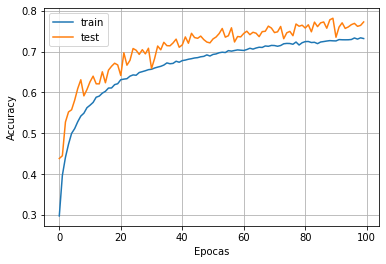

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

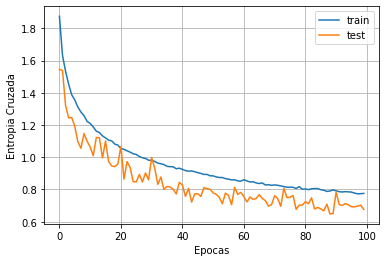

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [36]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[814  29  15  10  11   1   5   9  55  51]
 [  3 918   1   0   0   0   2   0   6  70]
 [100  15 528  43  76  40 129  33  14  22]
 [ 23  19  31 547  55 123  95  22  25  60]
 [ 24   9  22  14 781  16  78  39   7  10]
 [  5  11  18 115  47 673  38  52   9  32]
 [ 10  13   9  23  23   6 892   4   8  12]
 [ 16  12   7  21  48  35  13 801   3  44]
 [ 58  34   3   5   0   1   4   2 849  44]
 [ 12  45   1   2   1   0   4   0  13 922]]


In [37]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.83      0.92      0.87      1000
           2       0.83      0.53      0.65      1000
           3       0.70      0.55      0.61      1000
           4       0.75      0.78      0.76      1000
           5       0.75      0.67      0.71      1000
           6       0.71      0.89      0.79      1000
           7       0.83      0.80      0.82      1000
           8       0.86      0.85      0.85      1000
           9       0.73      0.92      0.81      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000

